<a href="https://colab.research.google.com/github/Afif-Ghifari/ML_S5_2025/blob/main/ML_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>UTS</h1>

<b>Nama : Muhammad Afif Al Ghifari</b><br>
<b>Kelas: TI-3H</b><br>
<b>NIM  : 2341720168</b>

In [8]:
!pip install annoy

In [9]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('/content/train.csv')

df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
# Tangani missing values
num_df = df.select_dtypes(include=['float64', 'int64'])
print(num_df.isnull().sum()[num_df.isnull().sum() > 0])
num_df.fillna(num_df.mean(), inplace=True)

# (Opsional) Buat fitur baru, contoh:
if 'GrLivArea' in df.columns and 'TotalBsmtSF' in df.columns:
    df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF']

# Normalisasi data numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df)

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [30]:
# KMeans
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Evaluasi
print("KMeans Silhouette:", silhouette_score(X_scaled, labels_kmeans))
print("KMeans Davies-Bouldin:", davies_bouldin_score(X_scaled, labels_kmeans))

# Hindari evaluasi DBSCAN bila semua noise (-1)
if len(set(labels_dbscan)) > 1:
    print("DBSCAN Silhouette:", silhouette_score(X_scaled, labels_dbscan))
    print("DBSCAN Davies-Bouldin:", davies_bouldin_score(X_scaled, labels_dbscan))
else:
    print("DBSCAN menghasilkan hanya 1 cluster (semua noise), evaluasi dilewati.")

KMeans Silhouette: 0.10669611321401172
KMeans Davies-Bouldin: 2.275359424693556
DBSCAN Silhouette: -0.21453432084698354
DBSCAN Davies-Bouldin: 1.9376277314018033


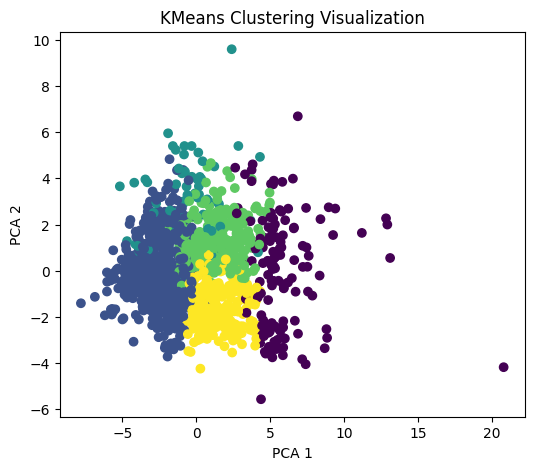

In [31]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis')
plt.title("KMeans Clustering Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [33]:
dim = X_scaled.shape[1]
ann = AnnoyIndex(dim, 'euclidean')

# Build index
for i, vec in enumerate(X_scaled):
    ann.add_item(i, vec)
ann.build(10)  # 10 trees

# Pilih query point (misal index ke-42)
query_idx = 42
neighbors, distances = ann.get_nns_by_item(query_idx, 5, include_distances=True)

print(f"Query Point Index: {query_idx}")
print("Nearest Neighbors and Distances:")
for n, d in zip(neighbors, distances):
    print(f"Neighbor Index: {n} | Distance: {d:.4f} | Cluster (KMeans): {labels_kmeans[n]}")

Query Point Index: 42
Nearest Neighbors and Distances:
Neighbor Index: 42 | Distance: 0.0000 | Cluster (KMeans): 1
Neighbor Index: 303 | Distance: 3.0500 | Cluster (KMeans): 1
Neighbor Index: 587 | Distance: 3.6170 | Cluster (KMeans): 1
Neighbor Index: 547 | Distance: 3.6941 | Cluster (KMeans): 1
Neighbor Index: 71 | Distance: 3.9207 | Cluster (KMeans): 1


- Perbedaan hasil KMeans dan DBSCAN, mana yang lebih baik diantara kedua model ini dan jelaskan jawaban anda <br>
**Jawab:**<br>
  - KMeans membagi data ke dalam k cluster (k ditentukan manual), dengan asumsi bentuk cluster bulat/sferis dan ukuran relatif sama yang menghasiklan semua data selalu masuk ke salah satu cluster.
  - DBSCAN mengelompokkan berdasarkan kepadatan titik (density), bukan jumlah cluster tetap dengan hasil data dengan kepadatan rendah dianggap noise (label = -1).

- Nilai metrik terbaik (Silhouette, DBI).<br>
**Jawab:**<br>
KMeans Silhouette: 0.10669611321401172<br>
KMeans Davies-Bouldin: 2.275359424693556<br>
DBSCAN Silhouette: -0.21453432084698354<br>
DBSCAN Davies-Bouldin: 1.9376277314018033

- Hasil query Annoy: apakah tetangga yang ditemukan termasuk dalam cluster yang
sama? Jelaskan jawaban anda.<br>
**Jawab:**<br>
tetangga yang ditemukan oleh Annoy termasuk dalam cluster yang sama.
Hal ini menunjukkan bahwa model KMeans berhasil membentuk local cohesion yang baik di sekitar titik 42, titik-titik yang secara fitur mirip memang berada dalam cluster yang sama.